<a href="https://colab.research.google.com/github/poteznyszymon/pytorch_LinearRegressionModel_2/blob/main/01_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [408]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [409]:
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias

In [410]:
X_train = X[:80]
y_train = y[:80]
X_test = X[80:]
y_test = y[80:]

In [411]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Traning data')
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'Test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = 'Predictions')

  plt.legend(prop = {"size" : 14})

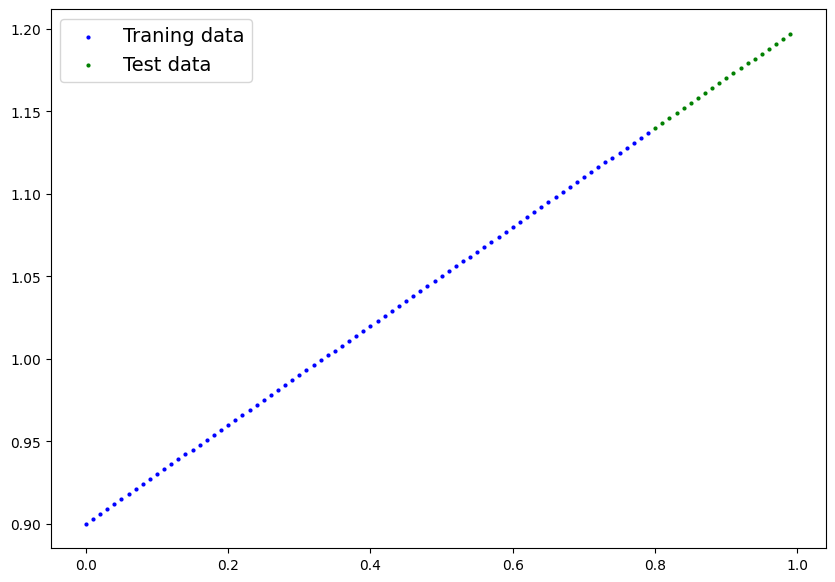

In [412]:
plot_predictions()

In [413]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [414]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

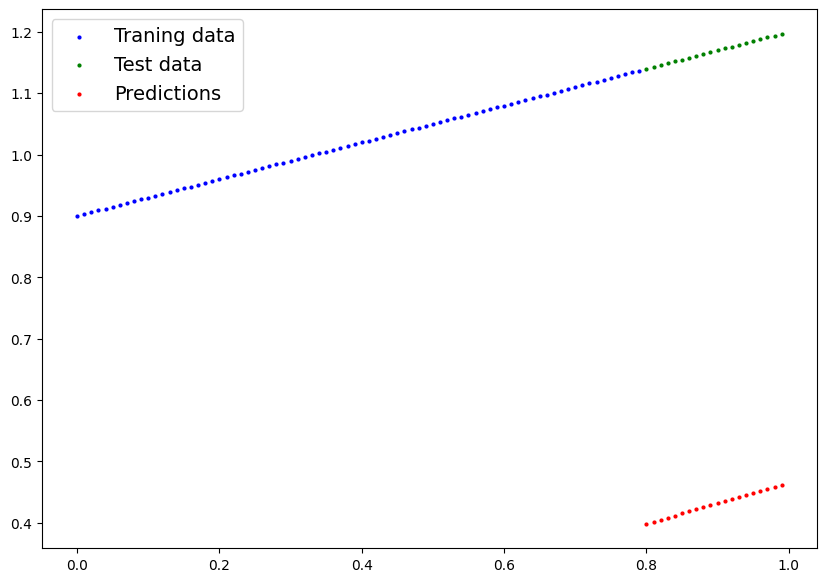

In [415]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [416]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [417]:
torch.manual_seed(42)

epoch_count = []
loss_values = []
test_loss_values = []
epochs = 300

for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)
  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  # optimizer zero grad
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  # step the optimizer
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred, y_test)
    if epoch % 30 == 0:
      print(f'Epoch: {epoch} | Test: {loss} | Test_loss: {test_loss}')
      print(model_0.state_dict())
    if epoch == 299:
      print(f'Epoch: {epoch} | Test: {loss} | Test_loss: {test_loss}')
      print(model_0.state_dict())

Epoch: 0 | Test: 0.7566978335380554 | Test_loss: 0.7248174548149109
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 30 | Test: 0.40989047288894653 | Test_loss: 0.31876006722450256
OrderedDict([('weights', tensor([0.4591])), ('bias', tensor([0.4388]))])
Epoch: 60 | Test: 0.07658576965332031 | Test_loss: 0.07274086028337479
OrderedDict([('weights', tensor([0.5712])), ('bias', tensor([0.7301]))])
Epoch: 90 | Test: 0.04897591844201088 | Test_loss: 0.11232650279998779
OrderedDict([('weights', tensor([0.5414])), ('bias', tensor([0.7963]))])
Epoch: 120 | Test: 0.03868866711854935 | Test_loss: 0.08938358724117279
OrderedDict([('weights', tensor([0.4906])), ('bias', tensor([0.8188]))])
Epoch: 150 | Test: 0.02840748429298401 | Test_loss: 0.06643994152545929
OrderedDict([('weights', tensor([0.4398])), ('bias', tensor([0.8413]))])
Epoch: 180 | Test: 0.018130185082554817 | Test_loss: 0.04212062805891037
OrderedDict([('weights', tensor([0.3886])), ('bias', tensor([0.8

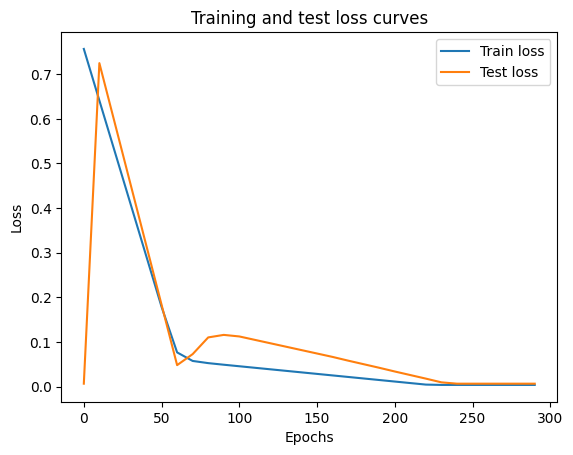

In [418]:
import numpy as np
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

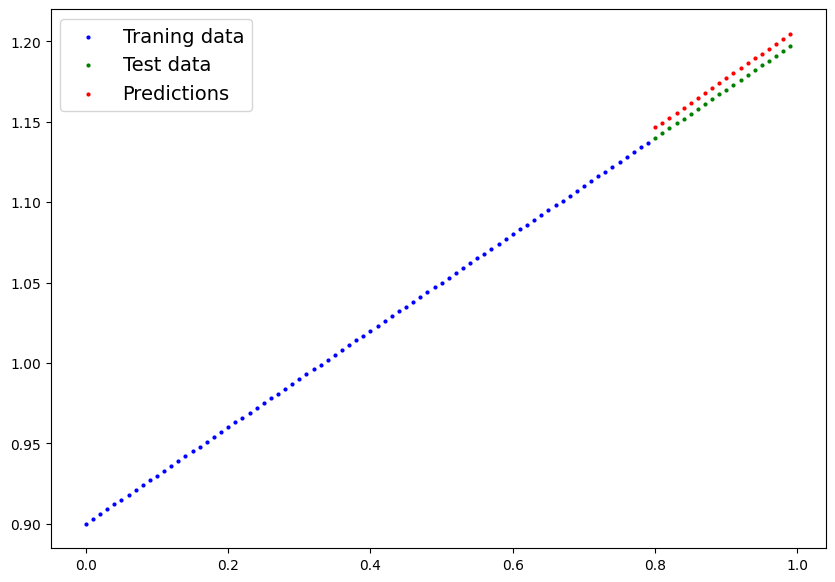

In [419]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(predictions=y_pred_new)

In [420]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = 'second_model.pth'

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/second_model.pth


In [421]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [426]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [427]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [428]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])